In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
import plotly.express as px
import scipy.stats as stats
from tqdm.notebook import tqdm
from IPython.display import Image, Video

### FCC решетка
Я реализовал генерацию fcc-решетки. Визуализация представлена в файлах fcc.mp4 и fcc_top.mp4. Ниже кадр из визуализации, и сами визуализации, полученные при помощи OVITO

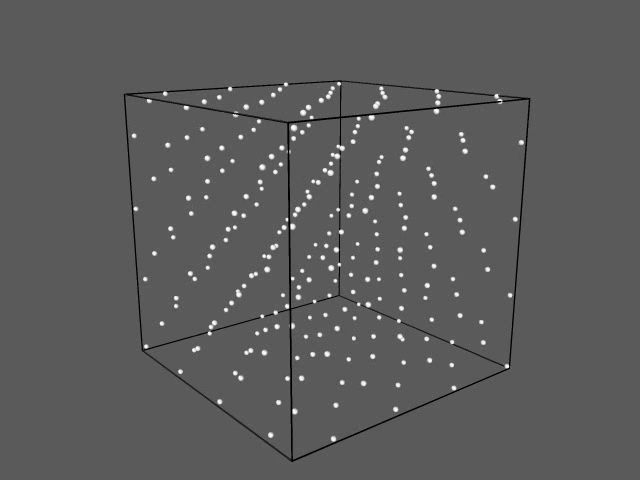

In [15]:
Image("fcc.png")

In [16]:
Video("fcc.mp4")

In [17]:
Video("fcc_top.mp4")

## RDF
Радиальные функции разпределения получены для: 
* твердого тела: $ N=256 \quad T=1.5 \quad \rho=1.2 $ 
* жидкости: $N=1024 \quad T=1.0 \quad \rho=0.7$ 
* газа: $N=1024 \quad T=30.0 \quad \rho=0.7$ 

Можно увидеть, что функции имеют вид, совпадающий с теоретическим. Зависимости сняты для ограниченного числа молекул, поэтому не являются гладкими

### Твердое тело
RDF имеет пики на $ 1, \sqrt{2}, \sqrt{3} ...$ соответствующие положениям молекул в решетке и равна нулю между ними

In [19]:
df = pd.read_csv("fcc.dat", sep=' ', names= ['x','y','z','vx','vy','vz','1','2','3','4','5','6','7','8'])
del df['1'], df['2'], df['3'], df['4'], df['5'], df['6'], df['7'], df['8']

In [20]:
dr = 0.03
r = np.arange(0, 3.0, dr)
rho = 1.2
particles = 256
cell = 5.975206329
g = np.zeros(len(r))
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['z'])
for n in tqdm(range(0,particles), desc="Points"):
    x0=x[n]
    y0=y[n]
    z0=z[n]
    rx = x0 - x
    ry = y0 - y
    rz = z0 - z
    rx -= np.rint(rx/cell)*cell
    ry -= np.rint(ry/cell)*cell
    rz -= np.rint(rz/cell)*cell
    rt = np.sqrt(rx*rx+ry*ry+rz*rz)
    rt = np.trunc(rt/dr)
    for j in rt:
        if j<len(g) and j>1:
            rc = j*dr
            g[int(j)]+=1/(4*rho*np.pi*rc*rc*dr)

g = g/particles

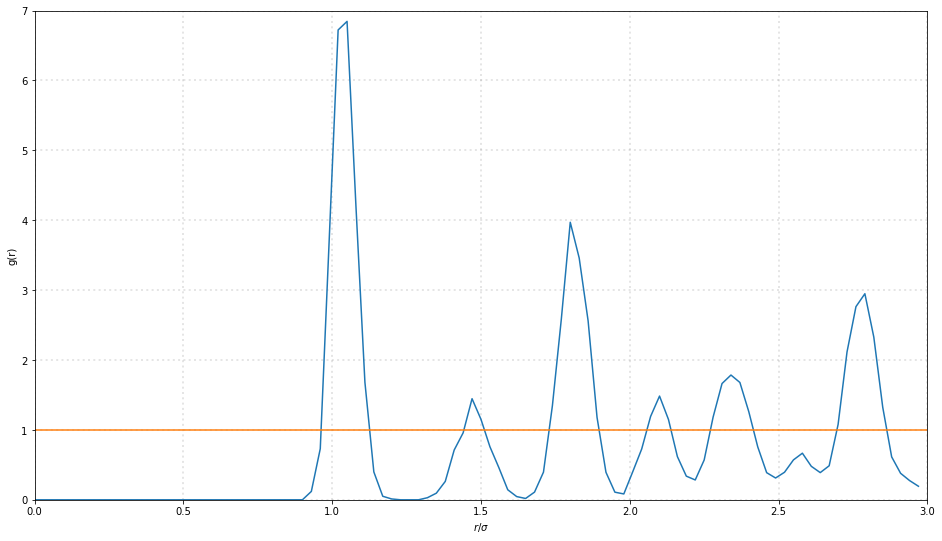

In [23]:
plt.plot(r, g)
plt.plot(np.arange(0, 4, 1), np.ones(4))
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel(r"$r/\sigma$")
plt.ylabel("g(r)")
plt.ylim(0,7)
plt.xlim(0,3)
plt.show()

### Жидкость
RDF имеет некоторые пики, соответствующие группам молекул в жидкости и достаточно быстро выходит на единицу

In [24]:
df = pd.read_csv("liquid.dat", sep=' ', names= ['x','y','z','vx','vy','vz','1','2','3','4','5','6','7','8'])
del df['1'], df['2'], df['3'], df['4'], df['5'], df['6'], df['7'], df['8']

In [25]:
dr = 0.03
r = np.arange(0, 6.0, dr)
rho = 0.7
particles = 1024
cell = 5.675933648*2
g = np.zeros(len(r))
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['z'])
for n in tqdm(range(0,particles), desc="Points"):
    x0=x[n]
    y0=y[n]
    z0=z[n]
    rx = x0 - x
    ry = y0 - y
    rz = z0 - z
    rx -= np.rint(rx/cell)*cell
    ry -= np.rint(ry/cell)*cell
    rz -= np.rint(rz/cell)*cell
    rt = np.sqrt(rx*rx+ry*ry+rz*rz)
    rt = np.trunc(rt/dr)
    for j in rt:
        if j<len(g) and j>1:
            rc = j*dr
            g[int(j)]+=1/(4*rho*np.pi*rc*rc*dr)

g = g/particles

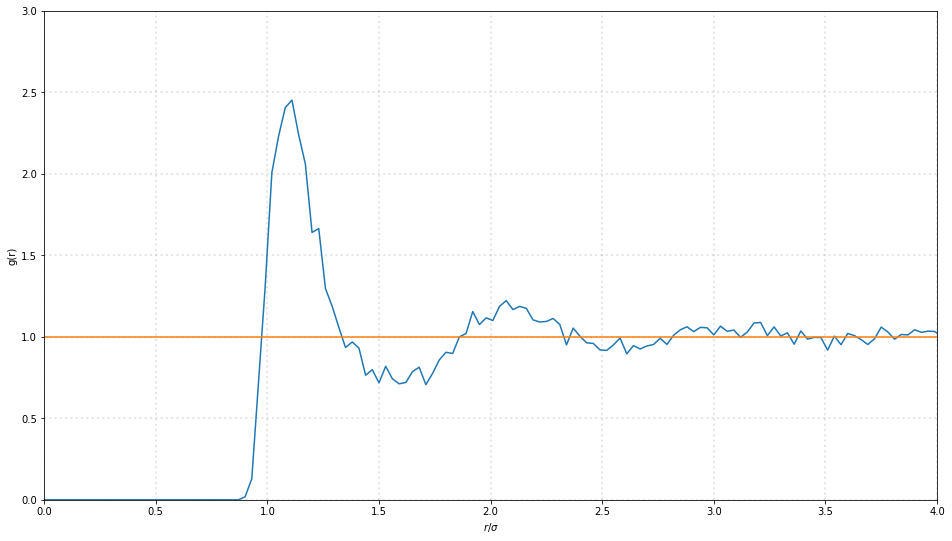

In [26]:
plt.plot(r, g)
plt.plot(np.arange(0, 7, 1), np.ones(7))
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel(r"$r/\sigma$")
plt.ylabel("g(r)")
plt.ylim(0,3)
plt.xlim(0,4)
plt.show()

### Газ
RDF имеет один пик на 1 и выходит на единицу с 2, что показывает отсутствие структур в газе

In [27]:
df = pd.read_csv("gas.dat", sep=' ', names= ['x','y','z','vx','vy','vz','1','2','3','4','5','6','7','8'])
del df['1'], df['2'], df['3'], df['4'], df['5'], df['6'], df['7'], df['8']

In [28]:
dr = 0.03
r = np.arange(0, 6.0, dr)
rho = 0.7
particles = 1024
cell = 5.675933648*2
g = np.zeros(len(r))
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['z'])
for n in tqdm(range(0,particles), desc="Points"):
    x0=x[n]
    y0=y[n]
    z0=z[n]
    rx = x0 - x
    ry = y0 - y
    rz = z0 - z
    rx -= np.rint(rx/cell)*cell
    ry -= np.rint(ry/cell)*cell
    rz -= np.rint(rz/cell)*cell
    rt = np.sqrt(rx*rx+ry*ry+rz*rz)
    rt = np.trunc(rt/dr)
    for j in rt:
        if j<len(g) and j>1:
            rc = j*dr
            g[int(j)]+=1/(4*rho*np.pi*rc*rc*dr)

g = g/particles

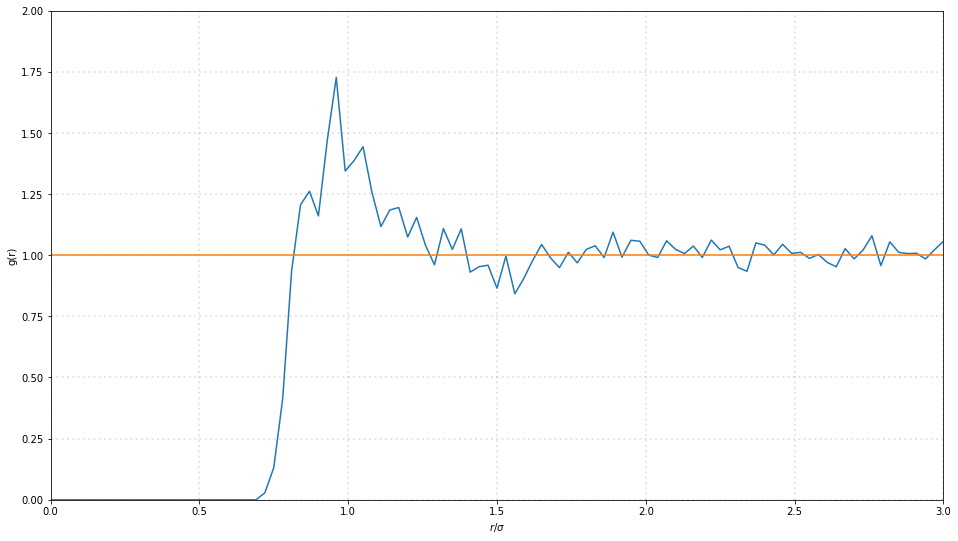

In [29]:
plt.plot(r, g)
plt.plot(np.arange(0, 4, 1), np.ones(4))
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel(r"$r/\sigma$")
plt.ylabel("g(r)")
plt.ylim(0,2)
plt.xlim(0,3)
plt.show()

## Критерий Линдемана